In [46]:
# Base Libraries
import matplotlib.pyplot as plt  
import numpy as np
import os
import pandas as pd
import seaborn as sns
# Transformation
from sklearn import preprocessing
# Models
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

import pandas as pd

# Specify the full file path to your CSV file on your local machine
file_path = r"E:\core prohect -spic\project\project code\Book14.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, sep=',')

# Set the display format for floating-point numbers in the DataFrame
pd.options.display.float_format = '{:.4f}'.format

df["Is Daylight"] = df["Is Daylight"].astype(int)


df = df.drop(columns = ["Day of Year"])
df = df.drop(columns = ["Month"])
df = df.drop(columns = ["Day"])
df = df.drop(columns = ["Visibility"])
df = df.drop(columns = ["Average Barometric Pressure (Period)"])
df.fillna(0, inplace=True)
df.isnull().sum()
df.isna().sum()

subdata = df.groupby('Year').sum()['Power Generated']

scaler = preprocessing.MinMaxScaler()

df[['Power Generated',
    'Average Temperature (Day)',
    'Average Wind Speed (Day)',
    'Relative Humidity',
    'Average Wind Speed (Period)',
    'Average Wind Direction (Day)'
   ]] = scaler.fit_transform(df[['Power Generated',
                                 'Average Temperature (Day)',
                                 'Average Wind Speed (Day)',
                                 'Relative Humidity',
                                 'Average Wind Speed (Period)',
                                 'Average Wind Direction (Day)'
                                ]])


df.head(10)
X = df.iloc[:,0:10]
y = df.iloc[:,10]
X.head(10)
y.head()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

rmsle_val = []
best_rmsle = 1.0

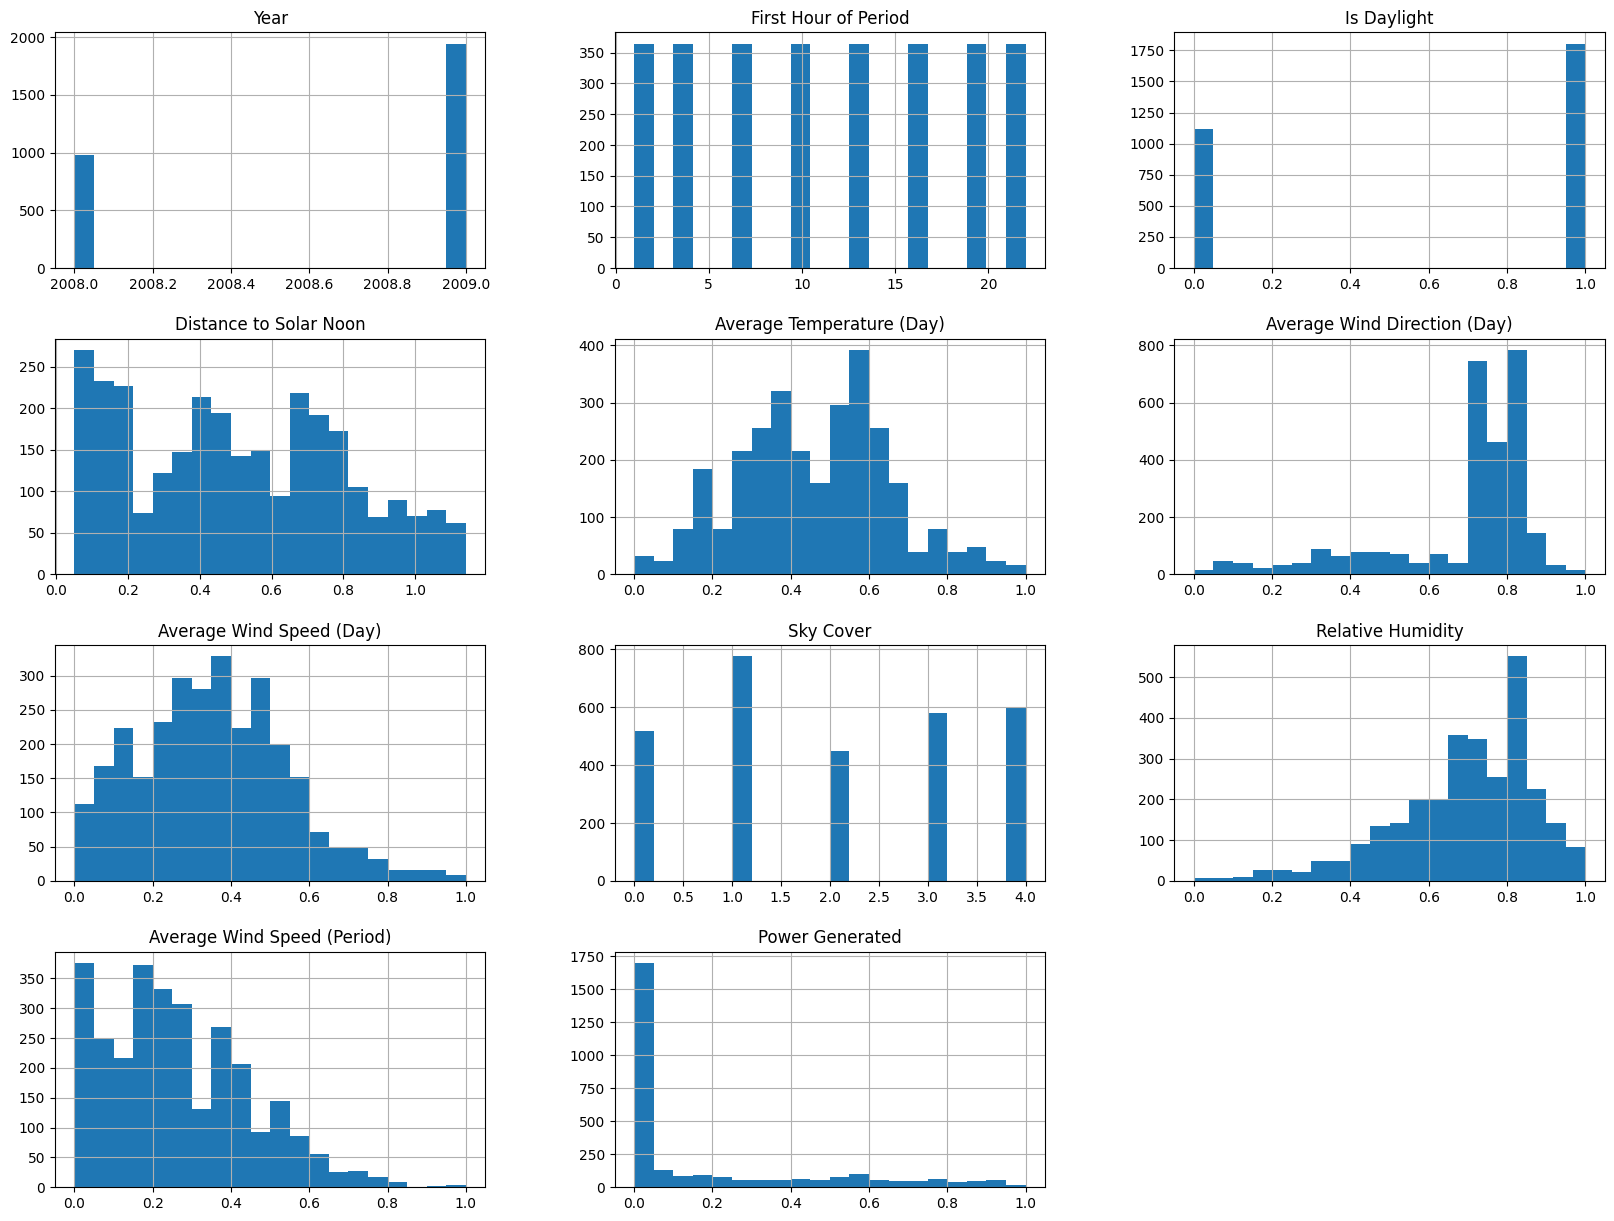

In [47]:
df.hist(bins=20,figsize=(20,15)) 
plt.show()


In [48]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.metrics import r2_score

# Creating an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 0)

# Fitting the model with training data
xg_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_xg = xg_reg.predict(X_test)

# Calculating R-squared score
r2_score_xg = r2_score(y_test, y_pred_xg)

# Printing the R-squared score
print("R-squared score using XGBoost: ", r2_score_xg)


R-squared score using XGBoost:  0.9050511109266843


In [49]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score

# Create a Bayesian Regression model
bayesian_model = BayesianRidge()

# Fit the model using the training data
bayesian_model.fit(X_train, y_train)

# Predict using the test data
y_pred_bayesian = bayesian_model.predict(X_test)

# Calculate R-squared score to evaluate the model's performance
r2_score_bayesian = r2_score(y_test, y_pred_bayesian)

print("R-squared score for Bayesian Regression:", r2_score_bayesian)


R-squared score for Bayesian Regression: 0.6705181684772256


In [50]:
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, r2_score, mean_squared_log_error
import numpy as np
import xgboost as xgb

# Assuming you have trained your XGBoost model and obtained predictions y_pred_xg

# Add a small constant to avoid negative values in predictions and true labels
epsilon = 1
y_pred_xg_non_negative = y_pred_xg + epsilon
y_test_non_negative = y_test + epsilon

# Calculate metrics for XGBoost regression
xg_evs_valid = explained_variance_score(y_test, y_pred_xg, multioutput='uniform_average')
xg_max_error_valid = max_error(y_test, y_pred_xg)
xg_rmsle_valid = np.sqrt(mean_squared_log_error(y_test_non_negative, y_pred_xg_non_negative))
xg_mse_valid = mean_squared_error(y_test, y_pred_xg) 
xg_r2_valid = r2_score(y_test, y_pred_xg)

# Print the metrics
print('XGBoost - EVS      Valid:', xg_evs_valid)
print('XGBoost - MaxError Valid:', xg_max_error_valid)
print('XGBoost - RMSLE    Valid:', xg_rmsle_valid)
print('XGBoost - MSE      Valid:', xg_mse_valid)
print('XGBoost - R2       Valid:', xg_r2_valid)

XGBoost - EVS      Valid: 0.9053503441047991
XGBoost - MaxError Valid: 0.5945190787315369
XGBoost - RMSLE    Valid: 0.03631290817067857
XGBoost - MSE      Valid: 0.007551122840619918
XGBoost - R2       Valid: 0.9050511109266843


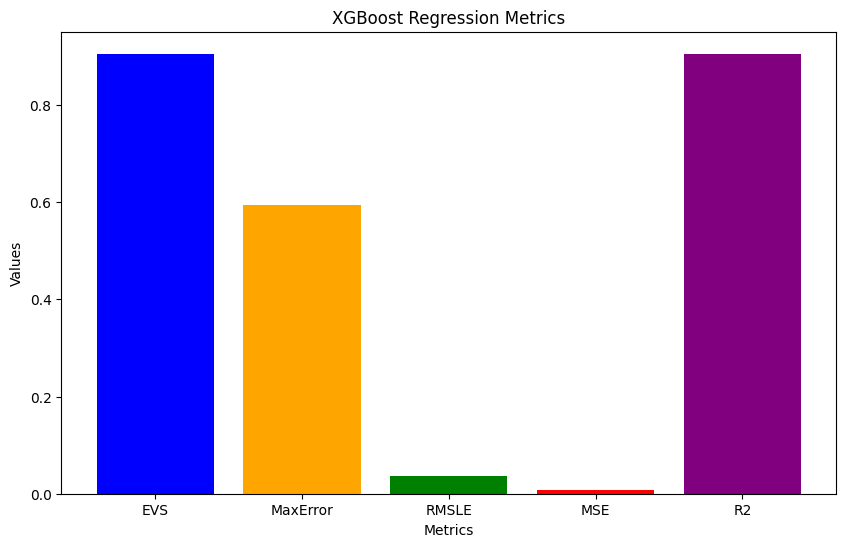

In [51]:
import matplotlib.pyplot as plt

# Metrics names
metrics_names = ['EVS', 'MaxError', 'RMSLE', 'MSE', 'R2']

# Metrics values
metrics_values = [xg_evs_valid, xg_max_error_valid, xg_rmsle_valid, xg_mse_valid, xg_r2_valid]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('XGBoost Regression Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()


In [52]:
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, r2_score, mean_squared_log_error
import numpy as np
from sklearn.linear_model import BayesianRidge

# Assuming you have trained your Bayesian Regression model and obtained predictions y_pred_bayesian

# Add a small constant to avoid negative values in predictions and true labels
epsilon = 1
y_pred_bayesian_non_negative = y_pred_bayesian + epsilon
y_test_non_negative = y_test + epsilon

# Calculate metrics for Bayesian regression
bayesian_evs_valid = explained_variance_score(y_test, y_pred_bayesian, multioutput='uniform_average')
bayesian_max_error_valid = max_error(y_test, y_pred_bayesian)
bayesian_rmsle_valid = np.sqrt(mean_squared_log_error(y_test_non_negative, y_pred_bayesian_non_negative))
bayesian_mse_valid = mean_squared_error(y_test, y_pred_bayesian) 
bayesian_r2_valid = r2_score(y_test, y_pred_bayesian)

# Print the metrics
print('Bayesian Regression - EVS      Valid:', bayesian_evs_valid)
print('Bayesian Regression - MaxError Valid:', bayesian_max_error_valid)
print('Bayesian Regression - RMSLE    Valid:', bayesian_rmsle_valid)
print('Bayesian Regression - MSE      Valid:', bayesian_mse_valid)
print('Bayesian Regression - R2       Valid:', bayesian_r2_valid)


Bayesian Regression - EVS      Valid: 0.6705750177716459
Bayesian Regression - MaxError Valid: 0.723857201188185
Bayesian Regression - RMSLE    Valid: 0.07223819652301296
Bayesian Regression - MSE      Valid: 0.026203126838691134
Bayesian Regression - R2       Valid: 0.6705181684772256


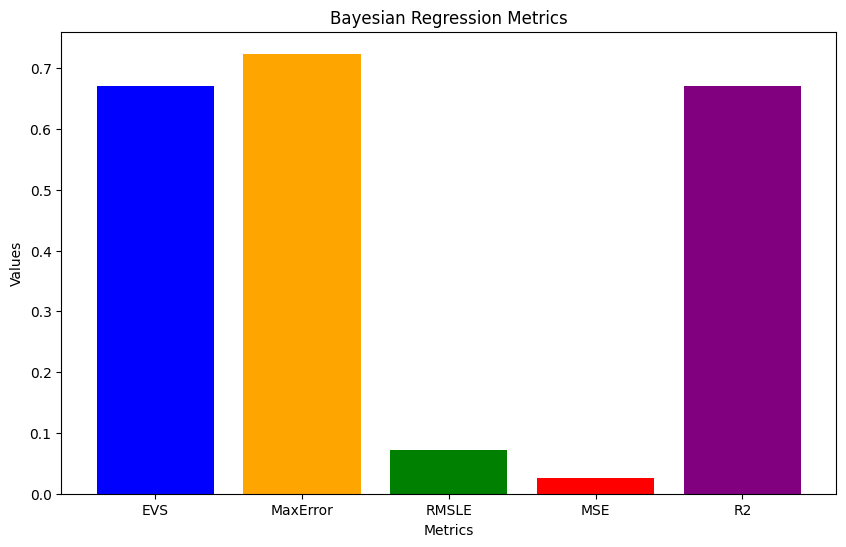

In [53]:
import matplotlib.pyplot as plt

# Metrics names
bayesian_metrics_names = ['EVS', 'MaxError', 'RMSLE', 'MSE', 'R2']

# Metrics values
bayesian_metrics_values = [bayesian_evs_valid, bayesian_max_error_valid, bayesian_rmsle_valid, bayesian_mse_valid, bayesian_r2_valid]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bayesian_metrics_names, bayesian_metrics_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Bayesian Regression Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()
